# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Задача - написать программу, которая будет отличать лес от пустыни.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
img_1 = cv2.imread('desert_forest/test_image_03.jpg')
img_2 = cv2.imread('desert_forest/test_image_10.jpg')
image_1 = cv2.cvtColor(img_1.copy(), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(img_2.copy(), cv2.COLOR_BGR2RGB)

# grayscale
gray_1 = cv2.cvtColor(image_1.copy(), cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(image_2.copy(), cv2.COLOR_RGB2GRAY)

## Гистограммы 

### Посмотрим для начала на метод анализа изображения через Гимстограммы ###

Так что такое гистограмма? Можно рассматривать гистограмму как график, который дает общее представление о распределении интенсивности изображения. Это график со значениями пикселей (от $0$ до $255$, не всегда) по оси $X$ и соответствующим количеством пикселей в изображении по оси $Y$.

Это просто еще один способ понять образ. Глядя на гистограмму изображения, мы получам представление о контрасте, яркости, распределении интенсивности и т.д. этого изображения. Почти все инструменты обработки изображений сегодня предоставляют функции на гистограмме.

<img src="https://i.ibb.co/cJxrWhx/histogram_sample.jpg" alt="Drawing" style="width: 400px;"/>

Можно увидеть изображение и его гистограмму. Примечание: эта гистограмма нарисована для изображения в оттенках серого, а не для цветного изображения. Левая область гистограммы показывает количество темных пикселей на изображении, а правая область показывает количество ярких пикселей. На гистограмме видно, что темная область больше, чем яркая, а количество полутонов (значения пикселей в среднем диапазоне, скажем, около $127$) намного меньше, чем остального.

0
144


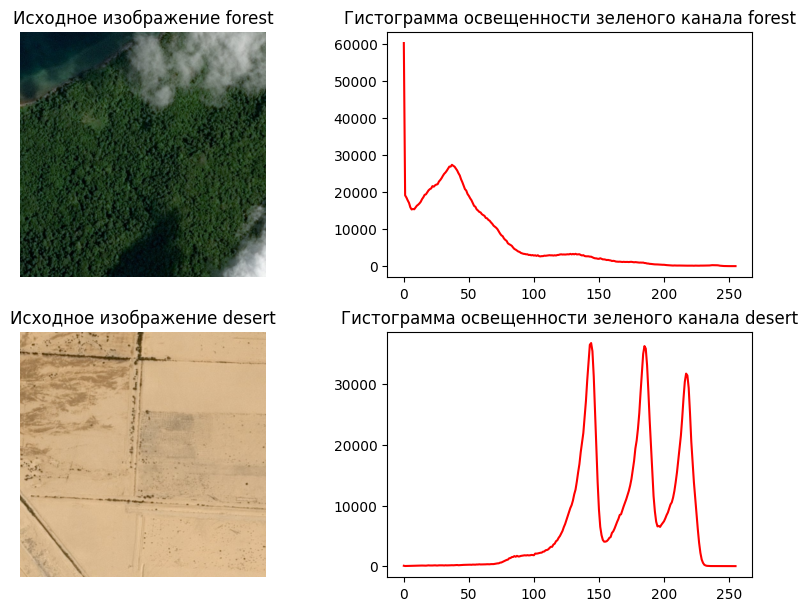

In [3]:
plt.figure(figsize=(8 ,6), constrained_layout=True)

plt.subplot(221)
plt.imshow(image_1)
plt.title('Исходное изображение forest'), plt.axis('off')

plt.subplot(222)
hist, bins = np.histogram(image_1.ravel(), 256, [0, 256])  
plt.plot(hist, color='r')
print(np.argmax(hist))
plt.title('Гистограмма освещенности зеленого канала forest')

plt.subplot(223)
plt.imshow(image_2)
plt.title('Исходное изображение desert'), plt.axis('off')

plt.subplot(224)
hist, bins = np.histogram(image_2.ravel(), 256, [0, 256])  
plt.plot(hist, color='r')
print(np.argmax(hist))
plt.title('Гистограмма освещенности зеленого канала desert')


plt.show()

In [4]:
def forest_vs_desert(image):
    hist, _ = np.histogram(image.ravel(), 256, [0, 256])
    if np.argmax(hist) < 70:
        return 'It is a forest'
    else:
        return 'It is a desert'

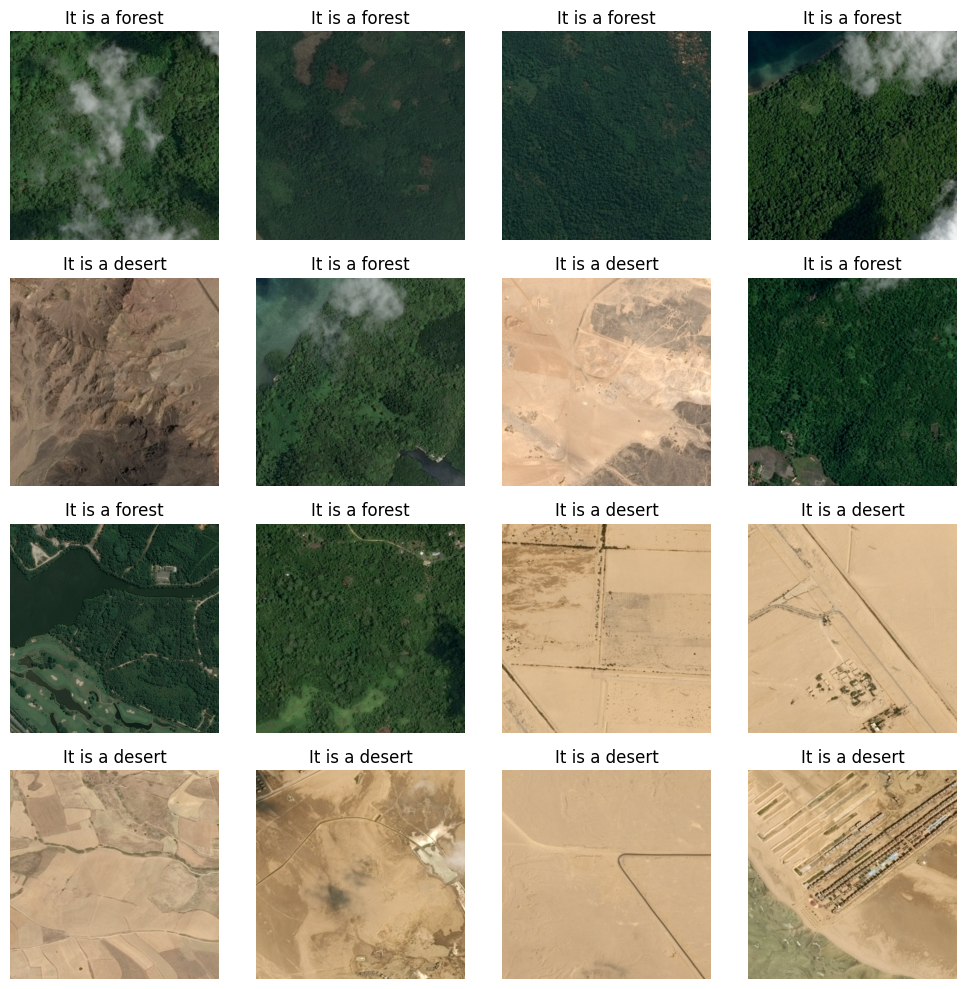

In [5]:
folder_path = "desert_forest"
numbers = [f"{i:02}" for i in range(17)]

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, number in zip(axes.ravel(), numbers):
    img = cv2.imread(f'desert_forest/test_image_{number}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)  
    ax.set_title(forest_vs_desert(img))         
    ax.axis('off')               

plt.tight_layout()
plt.show()

# Задача №2 - Реализовать Image-blending на основе сшивки по градиентам

Задача - взять фото двух лиц, и с помощью метода Poisson image editing совместить глаза, нос и рот с первого изображения со вторым. Суть в том, что при использовании такого метода границы совмещенного изображения не видны.

Статья, где описан метод  

Patrick Pérez, Michel Gangnet, and Andrew Blake. 2003. Poisson image editing. ACM Trans. Graph. 22, 3 (July 2003), 313–318. https://doi.org/10.1145/882262.882269

Пример такого совмещения:

<img src="blending/blending.png" alt="Drawing" style="width: 700px;"/>


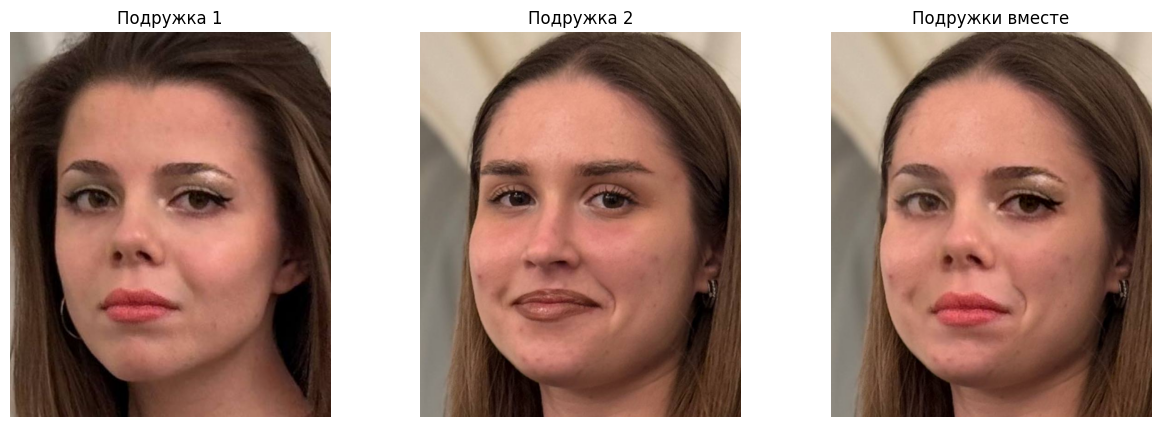

In [14]:
source = cv2.imread('blending/blending_1.jpg') 
target = cv2.imread('blending/blending_2.jpg')  
mask = cv2.imread('blending/blending_mask.jpg', 0)  

height, width = source.shape[:2]

target = cv2.resize(target, (width, height))
mask = cv2.resize(mask, (width, height))

# Блендинг Пуассона
result = cv2.seamlessClone(source, target, mask, (235, 350), cv2.NORMAL_CLONE) # координата подобрана вручную

source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(source)
axes[0].axis('off') 
axes[0].set_title('Подружка 1')

axes[1].imshow(target)
axes[1].axis('off') 
axes[1].set_title('Подружка 2')

axes[2].imshow(result)
axes[2].axis('off') 
axes[2].set_title('Подружки вместе')

plt.show()

# Задача №3 - Найти клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Задача - выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="blending/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

In [22]:
# вспомогательная функция
def plot_one_image(src_image, title='Исходное изображение', is_gray=False):
    """
    Отрисовать с помощью plt исходное изображение.
    
    :param src_image: np.ndarray: исходное изображение
    :param is_gray: bool: флаг для отображения ЧБ изображений
    :return: None
    """
    fig, m_axs = plt.subplots(1, 1, figsize=(6.4, 4.8), constrained_layout=False)
    ax1 = m_axs

    cmap = 'gray' if is_gray else None
    ax1.set_title(title)
    ax1.imshow(src_image, cmap=cmap)
    ax1.set_xticks([]), ax1.set_yticks([])
    plt.show()

In [16]:
# вспомогательная функция
def plot_transform_result(src_image, transform_image, is_gray=False):
    """
    Отрисовать с помощью plt исходное изображение и его преобразование.
    
    :param src_image: np.ndarray: исходное изображение
    :param transform_image: np.ndarray: преобразованное изображение
    :param is_gray: bool: флаг для отображения ЧБ изображений
    :return: None
    """
    fig, m_axs = plt.subplots(1, 2, figsize=(6.4*2, 4.8*2), constrained_layout=False)
    ax1, ax2 = m_axs

    cmap = 'gray' if is_gray else None
    ax1.set_title('Исходное изображение')
    ax1.imshow(src_image, cmap=cmap)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.set_title('Результат преобразования')
    ax2.imshow(transform_image, cmap=cmap)
    ax2.set_xticks([]), ax2.set_yticks([])
    plt.show()

Столкнулись с проблемой, что когда размеры изображения нацело не делятся на высоту полоски, нижняя часть объекта игнорируется и остается непокрытой квадратами. Чтобы избежать этого достроим изображение до подходящих размеров.

In [17]:
def extra_boarders(image, size):
    height, width = image.shape
    
    new_height = (size[0] - (height % size[0])) % size[0]
    new_width = (size[1] - (width % size[1])) % size[1]
    
    new_image = np.full((height + new_height, width + new_width), 255, dtype=image.dtype)
    new_image[:height, :width] = image
    
    return new_image

### Идея решения: 
Делим изображение на полоски. На каждой полоске считаем площадь заполненных пикселей (получаем распределение площади по полоскам).
В соответствии с распределением площадей распределяем общее количесво квадратов по полоскам.
На каждой полоске выделяем кластеры (сгустки пикселей). Кадый кластер покрываем группой квадратов.
Проверяем, чтобы центр группы квадратов совпадал с центром сгустка, и убираем накладывающиеся друг на друга квадраты. Готово. Попробуем это реализовать

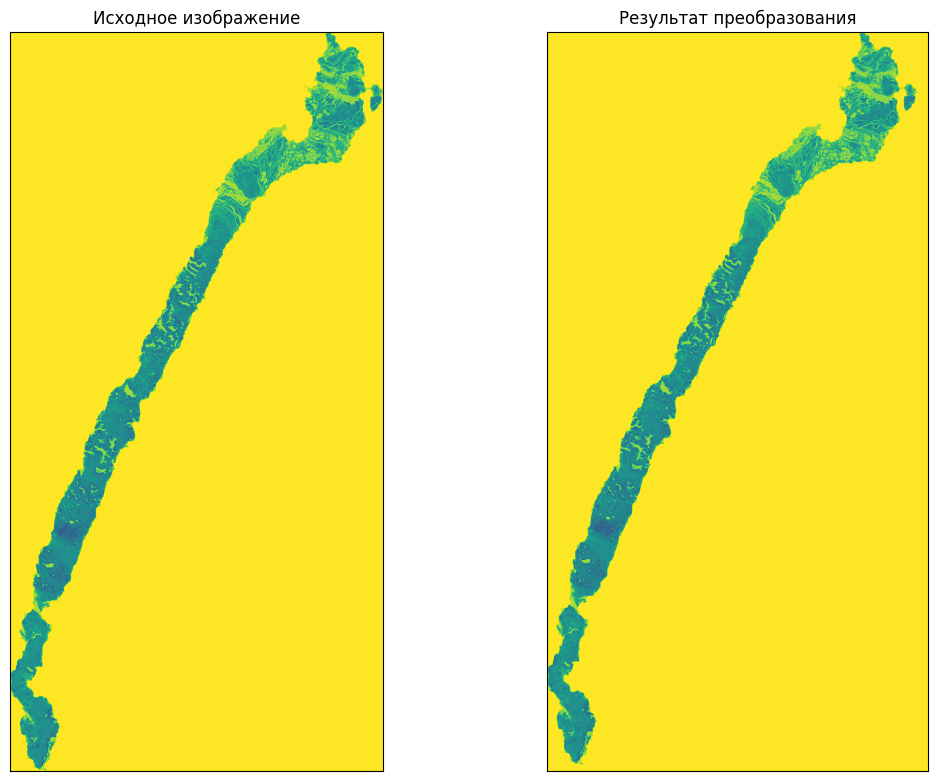

In [19]:
img = cv2.imread('cells/train2_1.jpeg', 0)
size = (250, 250)
new_img = extra_boarders(img, size)
plot_transform_result(img, new_img)

### Нарежем теперь наше изображение на полоски одинаковой ширины

In [20]:
def cut_in_lines(image, size):
    lines = []
    lines_count = image.shape[0] // size[0]
    
    for i in range(lines_count):
        line = image[i * size[0]:(i + 1) * size[0], :]
        lines.append(line)
    
    return lines, lines_count

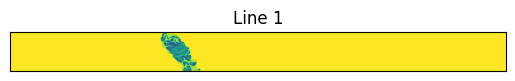

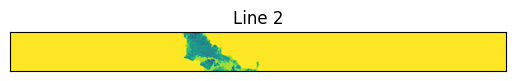

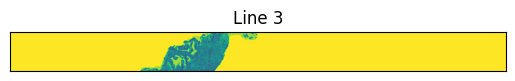

In [23]:
img = cv2.imread('cells/train0_1.jpeg', 0)
size = (250, 250)
lines, _ = cut_in_lines(img, size)
plot_one_image(lines[0], 'Line 1')
plot_one_image(lines[1], 'Line 2')
plot_one_image(lines[2], 'Line 3')


In [24]:
def normalization(lines):
    lines_square = np.array([len(np.where(line < 255)[0]) for line in lines])
    
    total = np.sum(lines_square)
    
    if total == 0:
        return np.zeros_like(lines_square)
    
    lines_square_norm = lines_square / total
    
    return lines_square_norm

In [25]:
print(lines)
norm_lines = normalization(lines)
np.sum(norm_lines)

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

np.float64(0.9999999999999999)

### На каждой полоске определим кластеры (сгустки пикселей). Каждый такой сгусток будем поотдельности покрывать группой идущих подряд квадратов

In [26]:
def find_clusters(line, threshold=0.5):
    binary = np.zeros_like(line)
    binary[line < 250] = 1
    
    pixel_distribution = np.sum(binary, axis=0)
    if np.max(pixel_distribution) == 0:
        return []
    
    normalized_distribution = pixel_distribution / np.max(pixel_distribution)

    centers = []
    in_cluster = False
    cluster_indices = []

    for x, value in enumerate(normalized_distribution):
        if value > threshold:
            in_cluster = True
            cluster_indices.append(x)
        else:
            if in_cluster:
                center_x = int(np.mean(cluster_indices))
                centers.append((center_x, len(cluster_indices)))
                cluster_indices = []
                in_cluster = False

    if in_cluster and cluster_indices:
        center_x = int(np.mean(cluster_indices))
        centers.append((center_x, len(cluster_indices)))

    return centers

In [27]:
line = lines[2]
centers = find_clusters(line)
print(centers)

[(1187, 368)]


### Определим каким будет распределение квадратов в полоске

In [43]:
def distribute_squares(centers, parts_line, image_width, size):
    if not centers:
        return []

    sorted_centers = sorted(centers, key=lambda x: x[1], reverse=True)
    if len(sorted_centers) > parts_line:
        sorted_centers = sorted_centers[:parts_line]

    total_length = sum([length for _, length in sorted_centers])
    if total_length == 0:
        return []

    lengths_proportions = [length / total_length for _, length in sorted_centers]
    square_lengths = [round(prop * parts_line) for prop in lengths_proportions]

    square_coordinates = []
    for index, (center_x, length) in enumerate(sorted_centers):
        num_squares = square_lengths[index]
        if num_squares == 0:
            continue
        
        step = length // num_squares if num_squares > 0 else length
        half_num_squares = num_squares // 2

        for j in range(num_squares):
            offset = (j - half_num_squares) * step if num_squares % 2 == 1 else (j - half_num_squares + 0.5) * step
            
            start_x = max(0, center_x - size[1] // 2 + int(offset))
            start_x = min(start_x, image_width - size[1])
            
            square_coordinates.append((start_x, 0, start_x + size[1], size[0]))

    return square_coordinates

In [38]:
parts_arr = np.array([40] * 16)
parts_distr = np.round(parts_arr * norm_lines).astype(int)
parts_line = parts_distr[0]
coordinates = distribute_squares(centers, parts_line, img.shape[1],size)

In [39]:
def remove_overlapping_squares(square_coordinates):
    non_overlapping_squares = []
    
    for new_square in square_coordinates:
        x1, y1, x2, y2 = new_square
        overlap = False
        for existing_square in non_overlapping_squares:
            ex1, ey1, ex2, ey2 = existing_square
            if not (x2 <= ex1 or x1 >= ex2 or y2 <= ey1 or y1 >= ey2):
                overlap = True
                break
        if not overlap:
            non_overlapping_squares.append(new_square)
    
    return non_overlapping_squares

In [40]:
def draw_squares(image, squares):
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    for (x1, y1, x2, y2) in squares:
        cv2.rectangle(output_image, (x1, y1), (x2, y2), (255, 0, 0), 7)
    
    return output_image

### Напишем пайплайн всего алгоритма, для быстрого тестирования разных изображений клеток

In [44]:
def find_parts(image, size, parts_count):
    image = extra_boarders(image, size)
    
    lines, lines_count = cut_in_lines(image, size)
    lines_square_norm = normalization(lines)

    parts_arr = np.array([parts_count] * lines_count)
    parts_distr = np.round(parts_arr * lines_square_norm).astype(int)

    square_coordinates = []
    for i in range(len(lines)):
        parts_line = int(parts_distr[i])
        line = lines[i]

        centers = find_clusters(line)
        
        squares = distribute_squares(centers, parts_line, image.shape[1], size)
        squares = [(x1, i * size[0] + y1, x2, i * size[0] + y2) for (x1, y1, x2, y2) in squares]
        square_coordinates.extend(squares)

    non_overlapping_squares = remove_overlapping_squares(square_coordinates)
    
    output_image = draw_squares(image, non_overlapping_squares)

    return output_image

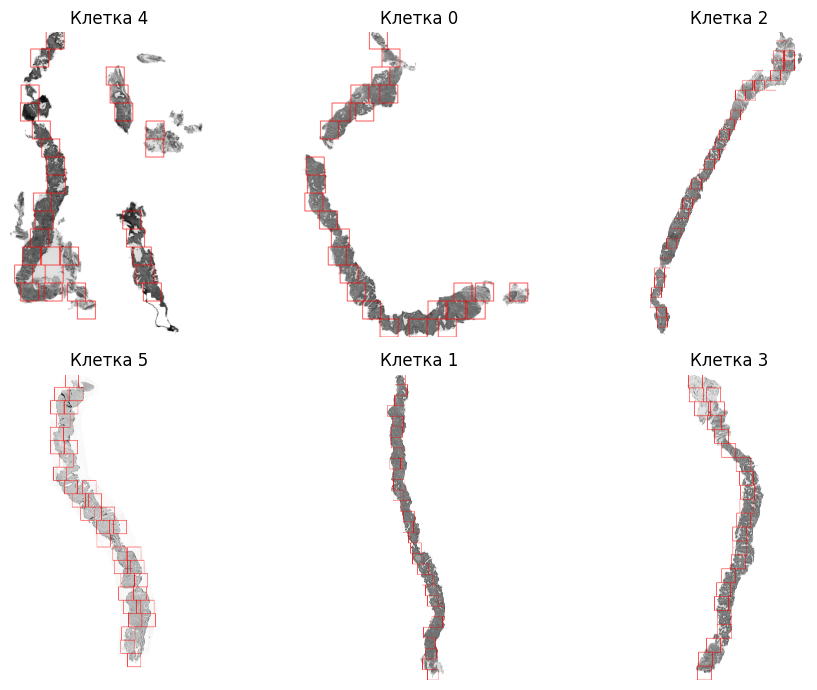

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for ax, filename in zip(axes.ravel(), os.listdir('cells/')):
    img = cv2.imread(f'cells/{filename}', 0)
    size = (250, 250)
    parts_count = 40
    result_img = find_parts(img, size, parts_count)
    # plot_one_image(result_img, f"Клетка {filename[5]}")
    ax.imshow(result_img)  
    ax.set_title(f"Клетка {filename[5]}")    
    ax.axis('off')               

plt.tight_layout()
plt.show()

### Вывод:
Мы не стали уже здесь вводить метрику для оценки качества используемого алгоритма, а лишь оценили на глаз. Видно, что метод отрабатывает довольно хорошо, покрывая большую часть клетки, особенно для односвязных объектов (Клетки 1,2,3 и 5). Для сравнения, у Клетки 4 есть непокрытые маленькие островки, которые занимали бы <0.5 площади квадрата. 

*Примечание*: алгоритм нацелен на то, чтобы покрыть объект минимальным необходимым количеством квадратов.

Сравнивая Клетки 1, 2, 3 (тонкие клетки) и Клетку 5 (широкая клетка) видно, что для случая, когда по ширине объект занимает нецелое число квадратов (1.5 для Клетки 5), в покрытую область будет включено много пустоты.

Для тонких же клеток иногда наблюдался сдвиг относительно центра масс класстера, причем сразу для нескольких рядов подряд, как например в нижней части Клетки 3. Мы подкорректировали ф-ию распределения квадратов в кластере и стало заметно лучше (Клетка 2), хотя небольшой сдвиг на некоторых клетках все еще можно наблюдать (Клетка 3).

В качестве адаптации этого алгоритма, можно добавить возможность квадратам выходить за рамки своего ряда после выделения кластеров. Такое расширение поможет учесть случаи когда объект заходит наполовину в верхний и наполовину в нижний ряд.